Exploratory Data Analysis (EDA)
Task 2 – CodeAlpha Internship



In [15]:
import pandas as pd
df = pd.read_csv("books_data.csv")
df.head()


,Title,Price,Rating,Availability
0,A Light in the Attic,Â£51.77,Three,In stock
1,Tipping the Velvet,Â£53.74,One,In stock
2,Soumission,Â£50.10,One,In stock
3,Sharp Objects,Â£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.show()



In [16]:
import numpy as np
df = pd.read_csv("books_data.csv")
df.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,Â£51.77,Three,In stock
1,Tipping the Velvet,Â£53.74,One,In stock
2,Soumission,Â£50.10,One,In stock
3,Sharp Objects,Â£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock


In [11]:
df.shape

(20, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         20 non-null     object
 1   Price         20 non-null     object
 2   Rating        20 non-null     object
 3   Availability  20 non-null     object
dtypes: object(4)
memory usage: 772.0+ bytes


In [13]:
df.isnull().sum()

Title           0
Price           0
Rating          0
Availability    0
dtype: int64

Questions Before Analysis:
1. How many books are present in the dataset?
2. What are the different rating categories?
3. Are all books currently in stock?
4. Are there any missing or incorrect values?
5. Does book price vary with rating?


In [18]:
df.shape


(20, 4)

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         20 non-null     object
 1   Price         20 non-null     object
 2   Rating        20 non-null     object
 3   Availability  20 non-null     object
dtypes: object(4)
memory usage: 772.0+ bytes


In [20]:
df.isnull().sum()


Title           0
Price           0
Rating          0
Availability    0
dtype: int64

In [42]:

df["Price"] = df["Price"].astype(str)

df["Price"] = df["Price"].str.replace(r"[^\d.]", "", regex=True)

df["Price"] = df["Price"].astype(float)

df.head()


,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


Price Column Cleaning:
The price column contained special characters and mixed data types.
All values were first converted to text, cleaned, and then converted
to numeric format for accurate analysis.


In [29]:
df.shape


(20, 4)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         20 non-null     object 
 1   Price         20 non-null     float64
 2   Rating        20 non-null     object 
 3   Availability  20 non-null     object 
dtypes: float64(1), object(3)
memory usage: 772.0+ bytes


In [31]:
df.describe()


,Price
count,20.000000
mean,38.048500
std,15.135231
min,13.990000
25%,22.637500
50%,41.380000
75%,51.865000
max,57.250000


In [32]:
df["Rating"].value_counts()


Rating
One      6
Four     4
Five     4
Three    3
Two      3
Name: count, dtype: int64

In [33]:
df.groupby("Rating")["Price"].mean()


Rating
Five     39.750000
Four     31.105000
One      40.018333
Three    42.316667
Two      36.830000
Name: Price, dtype: float64

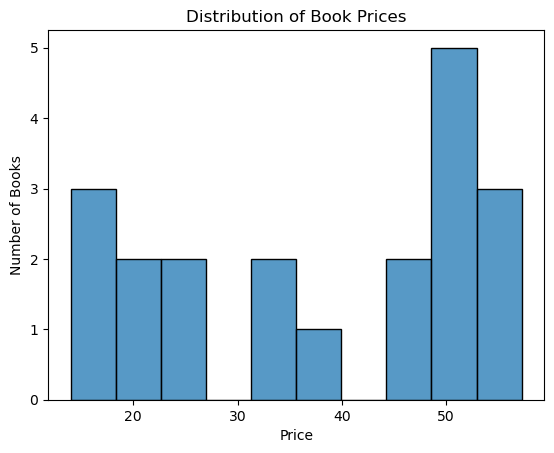

In [34]:
plt.figure()
sns.histplot(df["Price"], bins=10)
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Number of Books")
plt.show()


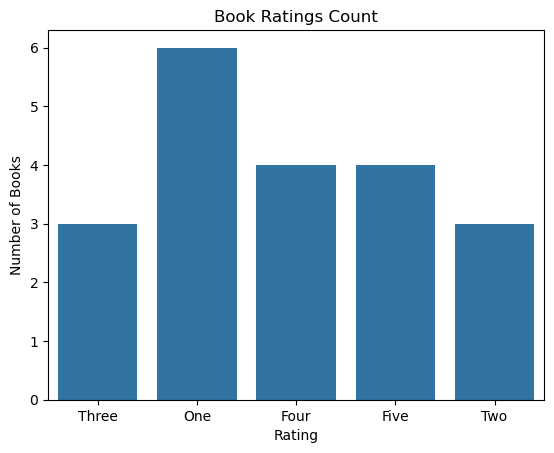

In [35]:
plt.figure()
sns.countplot(x="Rating", data=df)
plt.title("Book Ratings Count")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.show()


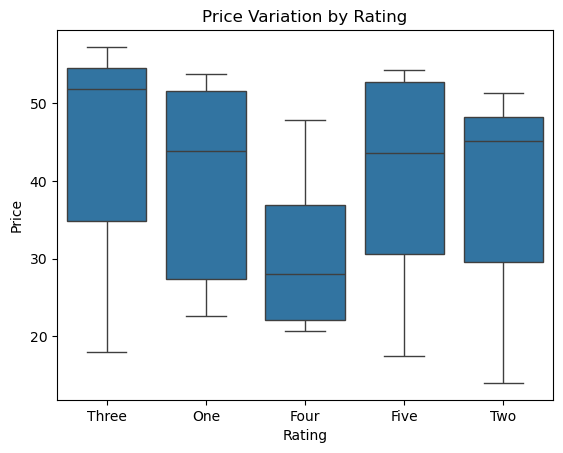

In [36]:
plt.figure()
sns.boxplot(x="Rating", y="Price", data=df)
plt.title("Price Variation by Rating")
plt.show()


Hypothesis:
Books with higher ratings are more expensive.

Validation:
Based on the boxplot and average price comparison, book price does not
consistently increase with rating. This indicates that rating alone
does not strongly influence book price.


Key Insights:
- The dataset contains books with multiple rating categories.
- Book prices show moderate variation with some high-priced outliers.
- Most books are currently in stock.
- Rating does not have a strong impact on price.
- The dataset is clean and suitable for further visualization.


Data Visualization (Task 3)


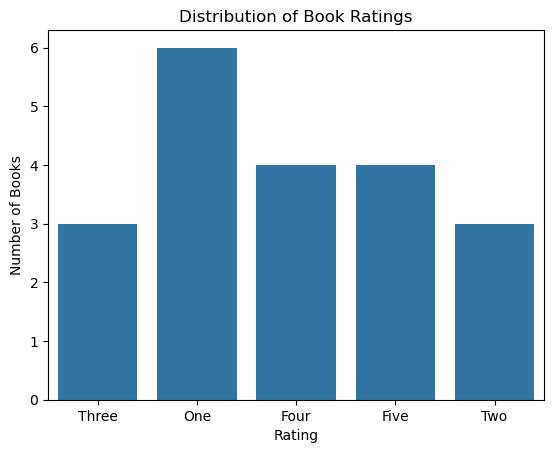

In [37]:
plt.figure()
sns.countplot(x="Rating", data=df)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.show()


This chart shows the distribution of book ratings.
Most books fall under specific rating categories, indicating reader preferences.


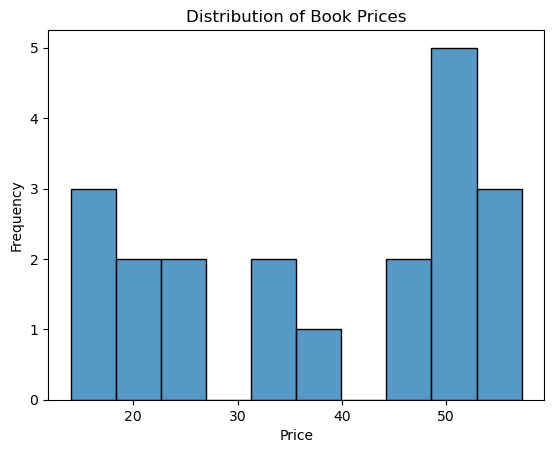

In [38]:
plt.figure()
sns.histplot(df["Price"], bins=10)
plt.title("Distribution of Book Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


The histogram shows that most book prices fall within a moderate range,
with a few higher-priced outliers.


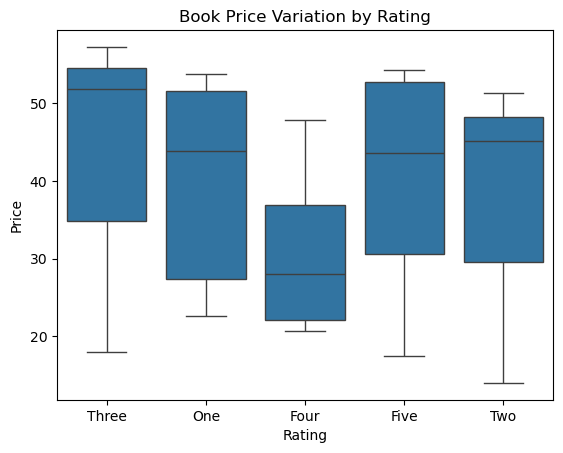

In [39]:
plt.figure()
sns.boxplot(x="Rating", y="Price", data=df)
plt.title("Book Price Variation by Rating")
plt.show()


This box plot compares book prices across ratings.
Price variation exists across all ratings, and higher ratings do not
consistently correspond to higher prices.


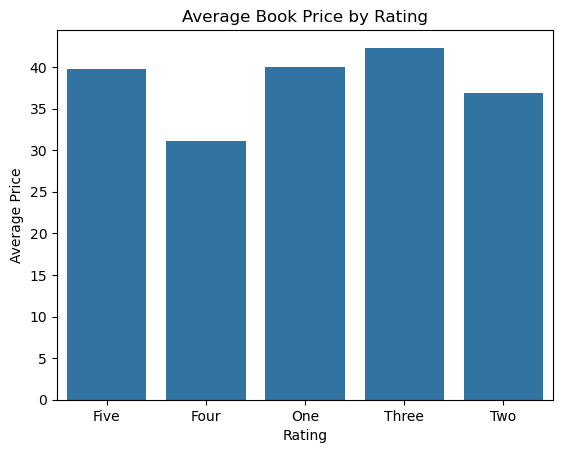

In [40]:
avg_price = df.groupby("Rating")["Price"].mean().reset_index()

plt.figure()
sns.barplot(x="Rating", y="Price", data=avg_price)
plt.title("Average Book Price by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Price")
plt.show()


This chart shows the average price of books for each rating category.
It helps in understanding whether ratings influence pricing.


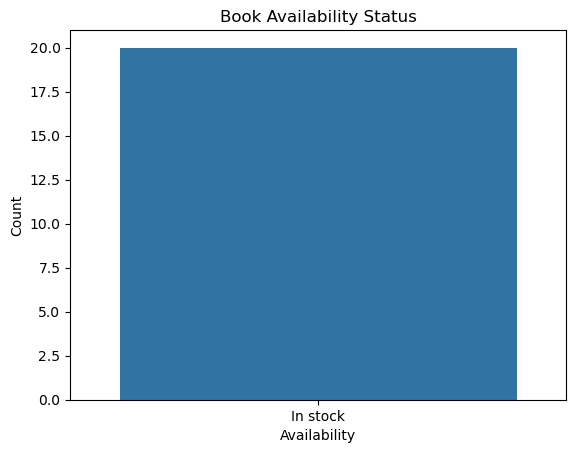

In [41]:
plt.figure()
sns.countplot(x="Availability", data=df)
plt.title("Book Availability Status")
plt.xlabel("Availability")
plt.ylabel("Count")
plt.show()


This chart indicates that all books in the dataset are currently in stock.


Data Story:
The visualizations show that book prices are moderately distributed,
with some higher-priced outliers. Ratings vary across books, but higher
ratings do not necessarily imply higher prices. Most books are in stock,
indicating good availability. These insights suggest that pricing is
likely influenced by factors other than ratings alone.
